# Perform optimization

### Jul 10, 2020

## Code

In [1]:
import sys
sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.18/04


In [21]:
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/JuPyter_Notebooks")
import util_analysis
import time
import pandas as pd
util_analysis.isBadrun(2275,2)

False

### Explore ROOT file

In [3]:
f = ROOT.TFile.Open("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ValsForCuts/A2/c1/cutvals_drop_FiltSurface_snrbins_0_0_wfrmsvals_-1.3_-1.4_run_2275.root")
f.ls()

TFile**		/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ValsForCuts/A2/c1/cutvals_drop_FiltSurface_snrbins_0_0_wfrmsvals_-1.3_-1.4_run_2275.root	
 TFile*		/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ValsForCuts/A2/c1/cutvals_drop_FiltSurface_snrbins_0_0_wfrmsvals_-1.3_-1.4_run_2275.root	
  KEY: TTree	VTree;1	VTree
  KEY: TTree	HTree;1	HTree
  KEY: TTree	AllTree;2	AllTree
  KEY: TTree	AllTree;1	AllTree
  KEY: TTree	OutputTree;1	OutputTree


In [ ]:
f.Get("AllTree").Print()

## Analyze data

In [4]:
file_list=[]#Define an empty list
for filename in os.listdir("//fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ValsForCuts/A2/c1/"):#Loop over desired directory
    if filename.endswith("275.root"): #extension, .root in this case
        file_list.append(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ValsForCuts/A2/c1/", str(filename))) #add file name to the list

In [6]:
VTree = TChain("VTree") #Define chain and tree that needs to be read. "VTree" in this case.
HTree = TChain("HTree")
AllTree = TChain("AllTree")

for line in file_list:
    VTree.AddFile(line)
    HTree.AddFile(line)
    AllTree.AddFile(line)

In [12]:
isSurf_array = []
theta_300 = []
phi_300 = []
program_starts = time.time()
for i in range(0, AllTree.GetEntries()):
    AllTree.GetEvent(i)
    VTree.GetEvent(i)
    if( (AllTree.soft or AllTree.bad or AllTree.hasBadSpareChanIssue or AllTree.isFirstFiveEvent or AllTree.badRun
         or AllTree.short or AllTree.cal)):
        continue
    if (AllTree.runNum==3663 and AllTree.eventNumber==6):
        continue
    corr_val = np.array([VTree.corr_val_V_new ,HTree.corr_val_H_new])
    snr_val = np.array([VTree.snr_val_V_new ,HTree.snr_val_H_new])
    WFRMS = np.array([VTree.wfrms_val_V_new, HTree.wfrms_val_H_new])
    isSurf = np.array([AllTree.surf_V_new, AllTree.surf_H_new])
    isSurf_array.append(AllTree.surf_V_new)
    theta_300.append(VTree.theta_300_V_new)
    phi_300.append(VTree.phi_300_V_new)

    isSurfEvent_top = np.array([AllTree.surf_top_V,AllTree.surf_top_H])
    for pol in range(0,2):
        if(WFRMS[pol]==0 and AllTree.box==0 and isSurf[0]==0 and isSurf[1]==0 and isSurfEvent_top[pol]==0):
            failsCWPowerCut=False

    
now = time.time()
print("It has been {0} seconds since the loop started".format(now - program_starts))


It has been 0.7194032669067383 seconds since the loop started


In [ ]:
for pol in range(0,2):
    print(pol)

In [ ]:
corr_val = []
snr_val = []
failsRcut = []
this_y_val = []
weight = []
energy = []
peakTheta_300m = []
peakPhi_300m = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    corr_val.append(entry.corr_val[0]) 
    snr_val.append(entry.snr_val[0]) 
    failsRcut.append(entry.failsRcut[0])
    this_y_val.append(entry.this_y_val[0])
    weight.append(entry.weight)
    energy.append(entry.energy)
    peakTheta_300m.append(entry.peakTheta_300m[0]+90)
    peakPhi_300m.append(entry.peakPhi_300m[0])

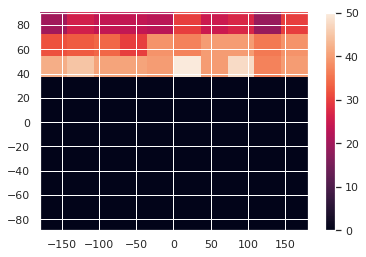

In [19]:
plt.hist2d(phi_300,theta_300, weights=isSurf_array);
plt.colorbar()

In [18]:
import seaborn as sns; sns.set()

In [23]:
d = {'phi': np.array(phi_300), 'theta': np.array(theta_300), 'isSurface' : np.array(isSurf_array)}
df = pd.DataFrame(data=d)

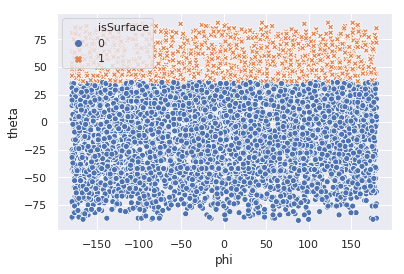

In [26]:
sns.scatterplot(x="phi", y="theta", hue="isSurface",style="isSurface",data=df)

## Comments

The files that Brian gave me are outdated, so I have to rerun everything and set the surface cut manually. Will re-do the analysis in a new notebook